In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('Sample_Data.csv')
df

,Values,Timestamp
0,100,26-06-2024 06:17:55
1,100,26-06-2024 06:18:11
2,100,26-06-2024 06:18:28
3,100,26-06-2024 06:18:45
4,100,26-06-2024 06:19:00
...,...,...
21914,92,03-07-2024 10:29:38
21915,92,03-07-2024 10:29:54
21916,92,03-07-2024 10:30:11
21917,92,03-07-2024 10:30:26


In [18]:
df.shape

(21919, 2)

In [19]:
df.rename(columns={"Values": "Voltage"}, inplace=True)

In [20]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df

C:\Users\priya\AppData\Local\Temp\ipykernel_9276\4180769462.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Timestamp"] = pd.to_datetime(df["Timestamp"])


,Voltage,Timestamp
0,100,2024-06-26 06:17:55
1,100,2024-06-26 06:18:11
2,100,2024-06-26 06:18:28
3,100,2024-06-26 06:18:45
4,100,2024-06-26 06:19:00
...,...,...
21914,92,2024-07-03 10:29:38
21915,92,2024-07-03 10:29:54
21916,92,2024-07-03 10:30:11
21917,92,2024-07-03 10:30:26


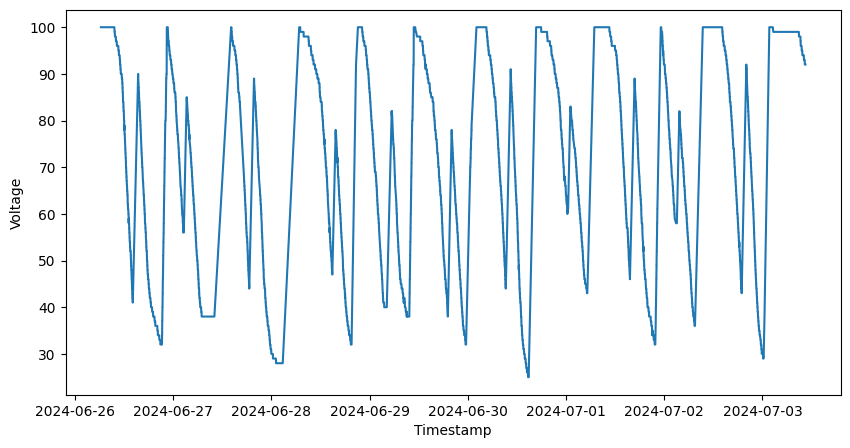

In [21]:
plt.figure(figsize=(10,5))
plt.plot(df["Timestamp"], df["Voltage"])
plt.xlabel("Timestamp")
plt.ylabel("Voltage")
plt.savefig("voltage_plot.png")
plt.show()

In [22]:
df["MA_1000"] = df["Voltage"].rolling(1000).mean()
df["MA_5000"] = df["Voltage"].rolling(5000).mean()
df

,Voltage,Timestamp,MA_1000,MA_5000
0,100,2024-06-26 06:17:55,NaN,NaN
1,100,2024-06-26 06:18:11,NaN,NaN
2,100,2024-06-26 06:18:28,NaN,NaN
3,100,2024-06-26 06:18:45,NaN,NaN
4,100,2024-06-26 06:19:00,NaN,NaN
...,...,...,...,...
21914,92,2024-07-03 10:29:38,64.473,64.9504
21915,92,2024-07-03 10:29:54,64.487,64.9548
21916,92,2024-07-03 10:30:11,64.501,64.9592
21917,92,2024-07-03 10:30:26,64.515,64.9636


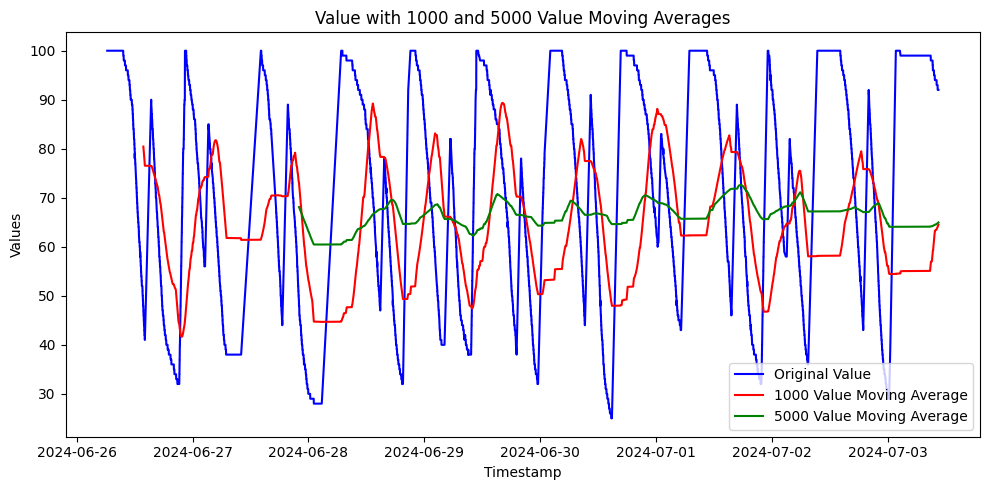

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(df["Timestamp"], df["Voltage"], color='blue')
plt.plot(df["Timestamp"], df["MA_1000"], color='red')
plt.plot(df["Timestamp"], df["MA_5000"], color='green')
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.title("Value with 1000 and 5000 Value Moving Averages")
plt.legend(["Original Value", "1000 Value Moving Average", "5000 Value Moving Average"])
plt.tight_layout()
plt.savefig("voltage_ma.png", dpi=300, bbox_inches="tight")
plt.show()

In [24]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(df["Voltage"])
lows, _ = find_peaks(-df["Voltage"])

peak_df = df.iloc[peaks][["Timestamp", "Voltage"]]
low_df = df.iloc[lows][["Timestamp", "Voltage"]]

In [25]:

peak_df.to_csv("voltage_peaks.csv", index=False)
peak_df

,Timestamp,Voltage
122,2024-06-26 09:57:56,98
361,2024-06-26 10:58:57,93
557,2024-06-26 11:49:49,83
603,2024-06-26 12:01:22,79
798,2024-06-26 12:55:48,62
...,...,...
21422,2024-07-02 23:18:22,35
21484,2024-07-02 23:43:44,32
21505,2024-07-02 23:49:13,31
21543,2024-07-03 00:09:26,30


In [26]:
low_df.to_csv("voltage_lows.csv", index=False)
low_df


,Timestamp,Voltage
120,2024-06-26 09:57:38,97
360,2024-06-26 10:58:56,92
556,2024-06-26 11:49:32,82
602,2024-06-26 12:01:06,78
795,2024-06-26 12:55:00,61
...,...,...
21421,2024-07-02 23:18:04,34
21482,2024-07-02 23:43:27,31
21504,2024-07-02 23:48:57,30
21542,2024-07-03 00:09:09,29


In [27]:
below_20 = df[df["Voltage"] < 20][["Timestamp", "Voltage"]]
below_20.to_csv("voltage_below_20.csv", index=False)
below_20

,Timestamp,Voltage


In [28]:
slope = df["Voltage"].diff()
slope

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21914    0.0
21915    0.0
21916    0.0
21917    0.0
21918    0.0
Name: Voltage, Length: 21919, dtype: float64

In [29]:
slope_change = slope.diff()
slope_change

0        NaN
1        NaN
2        0.0
3        0.0
4        0.0
        ... 
21914    0.0
21915    0.0
21916    0.0
21917    0.0
21918    0.0
Name: Voltage, Length: 21919, dtype: float64

In [30]:
downward_acc = df[(slope < 0) & (slope_change < 0)][["Timestamp"]]
downward_acc.to_csv("voltage_downward_acc.csv", index=False)
downward_acc

,Timestamp
36,2024-06-26 09:36:30
60,2024-06-26 09:42:33
120,2024-06-26 09:57:38
125,2024-06-26 09:58:47
174,2024-06-26 10:11:06
...,...
21687,2024-07-03 09:21:12
21732,2024-07-03 09:34:56
21769,2024-07-03 09:44:50
21831,2024-07-03 10:07:38
